In [85]:
import os
import json
dataset_dir = './dataset'
pre_dataset = os.listdir(dataset_dir)

In [86]:
url_list = []
data_list = []
for i in range(0,len(pre_dataset)):
    current_data_dir = './dataset/'+pre_dataset[i]
    current_html_dir = current_data_dir+'/body.html'
    result_json_dir = current_data_dir + '/result.json'
    target_json_dir = current_data_dir + '/result.json'
    if os.path.exists(result_json_dir) :
        with open(result_json_dir, 'r') as f:
            result_json = json.load(f)
            # print(result)
            result = result_json.get('results')
            url = result['passage_url']
            if url in url_list :
                # print("重复")
                continue
            else:
                url_list += [result['passage_url']]
                if result['body'] == 'None':
                    pass
                else:
                    data_list += [pre_dataset[i]]
    

In [87]:
valid_data = data_list

In [ ]:
# 获取文章浏览量和作者粉丝数的关系
"""{
   "version": "1.0",
   "results": {
      "create_time": "2019/10/03 12:05:59",
      "views": 1595,
      "body": "<article class=\"_2rhmJa\"><p>在这篇文章里，我简单地叙述了我在使用PyCharm创建一个flask项目时遇到的问题，以及我解决这个问题的过程。其中比较值得注意的点有：①PyCharm创建新项目时的解释器配置②Python虚拟环境的创建等。</p><h2><b>一、一些名词解释，希望能够帮助大家理解我所想表达的东西：</b></h2><p>①PyCharm：JetBrains公司出品的一款Python集成开发环境，是用于Python Web开发最好用的开发工具（似乎不用加“之一”）。一个好消息是，使用教育邮箱（类似xxx@cumt.edu.cn之类的由高校分配的邮箱）可以在JetBrains官网上申请到专业版的授权。</p><p>②pip：这是目前最好用的python第三方库安装工具，只需要一行代码便能为python安装一个库。</p><p>③虚拟环境：这是为了防止破坏或搞乱全局python解释器而创建的一个包含Python解释器的python开发和调试环境，在这个环境中进行新库的安装不会影响到全局解释器中的python库。</p><p>④flask：一个很受欢迎的python web开发框架。</p><h2><b>二、问题描述</b></h2><p>在pyCharm中创建flask项目时，在建立好虚拟环境，开始自动用pip工具安装flask的时候，软件提示：Install flask failed。如图所示：</p>\n    <figure class=\"figure\">\n        <img src=/media/6/1.png class=\"figure-img img-fluid rounded\" alt=\"...\">\n        <figcaption class=\"figure-caption\">A caption for the above image.</figcaption>\n    </figure>\n    <p>我的PyCharm 版本为2019.2.3专业版（这就是用教育邮箱白嫖的，感谢JetBrains）。</p><p>并且，我在我常用的Python的全局解释器中从没遇到过pip失效的问题！</p><h2><b> 三、解决</b></h2><h3><b>㈠【失败一（可以直接跳过）】按照错误提示中的\"Proposed solution\"来试了试</b></h3><p>①打开PyCharm中的终端，用 cd 命令进入到 项目文件夹\\venv\\Scripts 中，打开activate.bat 文件。手动激活PyCharm为这个项目配置的虚拟环境。</p><p>②试试 pip install flask ,结果如下图所示，其实和之前的错误提示一摸一样。</p>\n    <figure class=\"figure\">\n        <img src=/media/6/2.png class=\"figure-img img-fluid rounded\" alt=\"...\">\n        <figcaption class=\"figure-caption\">A caption for the above image.</figcaption>\n    </figure>\n    <p>③再试试用pip安装一下其他的东西，结果和上一步一样</p><p>④再试试用PyCharm创建一个Django项目，结果在自动使用 pip install django 时，出现了第二步同样的问题。</p><p>⑤可以初步得出结论：在这个虚拟环境中，pip失效了！至于为什么失效，错误提示中写的是：pip配置了需要tls/ssl的位置，但是python中的ssl模块不可用。说实话，我不太明白。</p><h3><b>㈡【成功解决】在创建新项目时选择一下解释器是基于谁创建的</b></h3><p>由于目前实在是不懂ssl这些，又感觉网上一些博客里边谈的东西太玄乎，我就想着直接干脆一点，把PyCharm创建的虚拟环境给换掉试试。</p><p>当我再次尝试创建一个新的flask项目时，我多留意了一下创建时可选的一些配置，my god，我感到有些崩溃，原来~~~PyCharm创建的这个虚拟环境默认是根据我暂时没怎么用的anaconda中的来的。</p>\n    <figure class=\"figure\">\n        <img src=/media/6/3.png class=\"figure-img img-fluid rounded\" alt=\"...\">\n        <figcaption class=\"figure-caption\">A caption for the above image.</figcaption>\n    </figure>\n    <p><br/></p><p>当我把 Based Interpreter 改为我的常用Python解释器（从python官网安装）的时候，项目便创建成功了，啥问题也没发生！</p><p>常常，人们在迷迷糊糊的时候感到肚子有点不舒服，一心忙着寻医问药，而不知道原来是自己忘记了而肚子饿了。</p><h2><b>四、总结</b></h2><p>①我成功的解决了我当下的问题，对于anaconda中的python解释器的毛病我是真的一窍不通，不过，好在目前我也没必要去了解得那么细。</p><p>②当用Python用得多了的时候，系统里很容易存在多个python解释器，这时候自己很容易被搞糊涂。我的建议是：在系统的环境变量中只配置自己最常用的那一个解释器所在的目录，并将其作为一个全局解释器，在其他地方需要单独的python解释器的时候，使用虚拟环境（可以用vitutual或pypenv等工具手动创建，也可以用PyCharn这类集成开发环境在创建项目时自动创建，不过不管是在哪里创建，都一定得注意要基于一个可靠的Python解释器创建！）。</p><p>③在PyCharm的新项目创建时，是可以对本项目即将使用的解释器进行配置的，可以选择：⑴新建虚拟环境的python解释器的存放位置 ⑵基于哪个解释器来新建虚拟环境的python解释器 ⑶使用已经存在的虚拟环境的解释器 ......</p></article>",
      "passage_url": "https://www.jianshu.com/p/a2cc3aae920d",
      "passage_title": "在PyCharm中遇到pip失效时的解决方案以及其他发现",
      "passage_abs": "在这篇文章里，我简单地叙述了我在使用PyCharm创建一个flask项目时遇到的问题，以及我解决这个问题的过程。其中比较值得注意的点有：①PyC...",
      "user_name": "Poplar_J_W",
      "user_homepage": "https://www.jianshu.com/u/d17b50762811",
      "comments": 1,
      "likes": 4,
      "user_info": {
         "name": "Poplar_J_W",
         "关注": 27,
         "粉丝": 6,
         "文章": 3,
         "字数": 27,
         "收获喜欢": 27,
         "总资产": 27
      },
      "tag": "else"
   },
   "explain": {
      "used": true,
      "details": "this is for josn test"
   }
}
"""

In [89]:
def load_json(json_dir):
    with open(json_dir, 'r') as f:
            result_json = json.load(f)
    return result_json['results']

In [90]:
result = load_json('./dataset/'+valid_data[0]+'/result.json')
result_views = result['views']
user_info = result['user_info']
user_follwers = user_info['粉丝']
print(result_views)
print(user_follwers)

145
16


In [91]:
def get_views_followers(json_dir):
    result = load_json(json_dir)
    views = result['views']
    user_follwers = result['user_info']['粉丝']
    return (views,user_follwers)

In [92]:
info_list = []
for data_dir in valid_data:
    json_dir = './dataset/'+data_dir+'/result.json'
    views_followers = get_views_followers(json_dir)
    info_list += [views_followers]

In [93]:
def takeSecond(elem):
    return elem[0]
info_list.sort(key=takeSecond,reverse=True)
print(info_list[6])

(101512, 293)


In [98]:
x = []
y = []
for i in range(0,5000):
    if info_list[i][0] >= 20000 or info_list[i][1] >= 10000:
        continue
    y += [info_list[i][0]]
    x += [info_list[i][1]]

In [99]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array(x) # x 为粉丝数量
y = np.array(y) # y 为浏览量
print(len(x))
print(len(y))
print(np.where(x == np.max(x)))
print(np.where(y == np.max(y)))

4833
4833
(array([ 756, 1122]),)
(array([0]),)


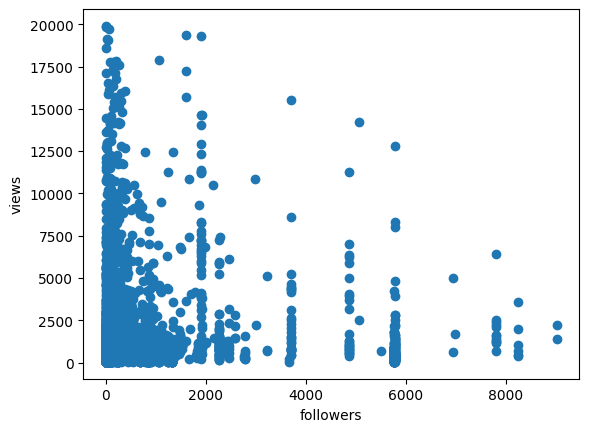

In [104]:
plt.scatter(x, y)
plt.xlabel('followers')
plt.ylabel('views')
plt.show()

In [107]:
def followers_article(json_dir):
    result = load_json(json_dir)
    user_info = result['user_info']
    followers = user_info['粉丝']
    articles = user_info['文章']
    return (articles,followers)

In [108]:
info_list = []
for data_dir in valid_data:
    json_dir = './dataset/'+data_dir+'/result.json'
    followers_articles = followers_article(json_dir)
    info_list += [followers_articles]

In [112]:
print(info_list[1]) # (文章数量，粉丝数量)
print(len(info_list))
# 文章数量作为 x 轴， 粉丝数量作为 y 轴

(42, 76)
5216


In [122]:
articles_x = []
followers_y = []
for i in range(0,5000):
    if info_list[i][0] > 500 or info_list[i][1]>4000:
        continue
    articles_x += [info_list[i][0]]
    followers_y += [info_list[i][1]]
print(len(articles_x))
print(len(followers_y))

4417
4417


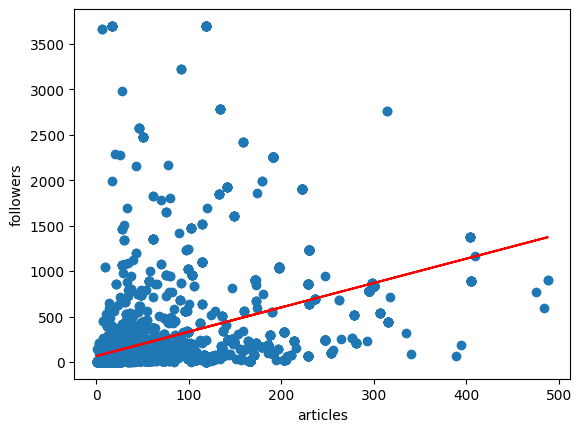

In [125]:
import pylab
plt.scatter(articles_x, followers_y)
z = np.polyfit(articles_x, followers_y, 1) 
p = np.poly1d(z) 
pylab.plot(articles_x,p(articles_x),"r") 
plt.xlabel('articles')
plt.ylabel('followers')
plt.show()

In [130]:
# 调查各时间段的发帖数量
# import re
# s = '2019/10/03 12:05:59'
# res = r'([\d]*)/([\d]*)/([\d]*)\s([\d]*)'
# res = re.compile(res)
# result = re.findall(res,s)
# print(result[0])
import re
def get_time(json_dir):
    result = load_json(json_dir)
    time = result['create_time']
    res = r'([\d]*)/([\d]*)/([\d]*)\s([\d]*)'
    res = re.compile(res)
    result = re.findall(res,time)
    year = result[0][0]
    month = result[0][1]
    hour = result[0][3]
    return (year,month,hour)

In [131]:
info_list = []
for data_dir in valid_data:
    json_dir = './dataset/'+data_dir+'/result.json'
    followers_articles = get_time(json_dir)
    info_list += [followers_articles]

In [147]:
year_list = []
month_list = []
hour_list = []
for info in info_list:
    year_list += [info[0]]
    month_list += [info[1]]
    hour_list += [info[2]]
hour_set = set(hour_list)
# print(hour_set)
hour_dict = {}
for hour in hour_set:
    num = hour_list.count(hour)
    # print(num)
    new = {hour:num}
    hour_dict.update(new)
print(hour_dict)

{'00': 143, '06': 24, '22': 299, '10': 319, '02': 26, '01': 41, '12': 164, '04': 3, '19': 266, '17': 410, '15': 539, '20': 274, '11': 354, '07': 32, '05': 10, '03': 9, '14': 417, '08': 79, '18': 292, '16': 471, '09': 216, '21': 308, '23': 226, '13': 294}


In [161]:
new = []
print(int('00'))
for data in hour_dict:
    new += [(int(data),hour_dict[data])]
# print(new)
def takeFirst(elem):
    return elem[0]
new.sort(key=takeFirst)
print(new)
hour_x = []
articles_y = []
for i in new:
    hour_x += [i[0]]
    articles_y += [i[1]]

0
[(0, 143), (1, 41), (2, 26), (3, 9), (4, 3), (5, 10), (6, 24), (7, 32), (8, 79), (9, 216), (10, 319), (11, 354), (12, 164), (13, 294), (14, 417), (15, 539), (16, 471), (17, 410), (18, 292), (19, 266), (20, 274), (21, 308), (22, 299), (23, 226)]


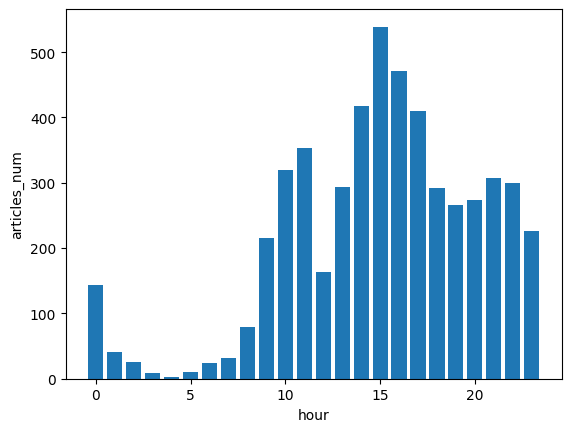

In [164]:
hour_x = np.array(hour_x)
articles_y = np.array(articles_y)
plt.bar(hour_x,articles_y)
plt.xlabel('hour')
plt.ylabel('articles_num')
plt.show()

{'05', '06', '11', '10', '03', '09', '02', '01', '12', '04', '07', '08'}
{'05': 574, '06': 474, '11': 350, '10': 266, '03': 536, '09': 178, '02': 462, '01': 344, '12': 388, '04': 610, '07': 531, '08': 503}
[(1, 344), (2, 462), (3, 536), (4, 610), (5, 574), (6, 474), (7, 531), (8, 503), (9, 178), (10, 266), (11, 350), (12, 388)]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[344, 462, 536, 610, 574, 474, 531, 503, 178, 266, 350, 388]


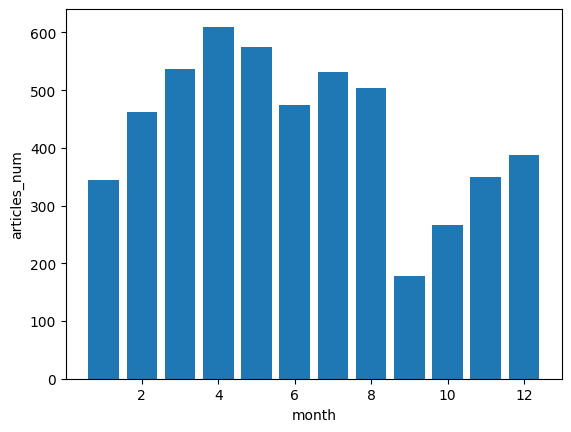

In [171]:
month_set = set(month_list)
print(month_set)
month_dict = {}
for month in month_set:
    num = month_list.count(month)
    # print(num)
    new = {month:num}
    month_dict.update(new)
print(month_dict)
new = []
for data in month_dict:
    new += [(int(data),month_dict[data])]
# print(new)
def takeFirst(elem):
    return elem[0]
new.sort(key=takeFirst)
print(new)
month_x = []
articles_y = []
for i in new:
    month_x += [i[0]]
    articles_y += [i[1]]
print(month_x)
print(articles_y)
month_x = np.array(month_x)
articles_y = np.array(articles_y)
plt.bar(month_x,articles_y)
plt.xlabel('month')
plt.ylabel('articles_num')
plt.show()

In [229]:
# 分析博客文章耦合度关系
def get_tag(json_dir):
    result = load_json(json_dir)
    article_body = str(result['body'])
    article_title = str(result['passage_title'])
    tag = []
    if article_body.upper().find('python'.upper())>=0 or article_title.upper().find('python'.upper())>=0:
        tag += ['python']
    if article_body.upper().find('javascript'.upper())>=0 or article_title.upper().find('javascript'.upper())>=0:
        tag += ['javascript']
    elif article_body.upper().find('java'.upper())>=0 or article_title.upper().find('java'.upper())>=0:
        tag += ['java']
    if article_body.upper().find('c#'.upper())>=0 or article_title.upper().find('c#'.upper())>=0:
        tag += ['c#']
    if article_body.upper().find('sql'.upper())>=0 or article_title.upper().find('sql'.upper())>=0:
        tag += ['sql']
    if article_body.upper().find('php'.upper())>=0 or article_title.upper().find('php'.upper())>=0:
        tag += ['php']
    if article_body.upper().find('c++'.upper())>=0 or  article_title.upper().find('c++'.upper())>=0:
        tag += ['c++']
    # if article_body.upper().find('java'.upper())>=0 or article_title.upper().find('java'.upper())>=0:
    #     if article_body.upper().count('java'.upper()) > article_body.upper().count('javascipt'.upper())+1:
    #         tag += ['java']
    if len(tag)==0:
        tag += ['others']
    return tag
    

In [230]:
info_list = []
for data_dir in valid_data:
    json_dir = './dataset/'+data_dir+'/result.json'
    tag_list = get_tag(json_dir)
    info_list += [tag_list]
print(info_list[0])

['javascript']


In [231]:
for info in info_list:
    if 'javascript' in info and 'java' not in info:
        print(info)

['javascript']
['javascript']
['javascript']
['javascript']
['javascript', 'sql']
['javascript', 'c#']
['javascript']
['javascript', 'php']
['javascript']
['javascript']
['javascript']
['javascript']
['javascript']
['javascript']
['javascript', 'php']
['javascript']
['python', 'javascript', 'sql']
['javascript']
['python', 'javascript', 'sql']
['javascript']
['javascript']
['javascript']
['javascript']
['javascript']
['javascript']
['javascript']
['python', 'javascript', 'sql']
['javascript']
['javascript']
['javascript']
['python', 'javascript', 'c#', 'php']
['javascript']
['javascript', 'sql']
['javascript']
['python', 'javascript', 'sql']
['javascript']
['javascript']
['javascript']
['javascript']
['javascript']
['javascript', 'php']
['javascript', 'php']
['javascript']
['javascript']
['javascript']
['javascript']
['javascript']
['javascript', 'php']
['javascript']
['javascript']
['javascript']
['javascript']
['javascript']
['javascript', 'c++']
['javascript']
['javascript']
['pytho

In [232]:
bi_data = []
result = []
for i in range(0,8):
    bi_data += [[0,0,0,0,0,0,0,0]]
    result += [[0,0,0,0,0,0,0,0]]
label = ['python','javascript','java','c++','c#','php','sql','others']

In [233]:
for info in info_list:
    for i in range(0,8):
        for j in range(0,8):
            if label[i] in info and label[j] in info:
                bi_data[i][j] += 1

In [234]:
for bi in bi_data:
    print(bi)

[1360, 109, 157, 99, 37, 99, 227, 0]
[109, 821, 0, 46, 29, 73, 65, 0]
[157, 0, 876, 70, 19, 81, 288, 0]
[99, 46, 70, 172, 22, 49, 47, 0]
[37, 29, 19, 22, 59, 24, 13, 0]
[99, 73, 81, 49, 24, 726, 153, 0]
[227, 65, 288, 47, 13, 153, 905, 0]
[0, 0, 0, 0, 0, 0, 0, 1571]


In [235]:
for i in range(7):
    for j in range(7):
        if i != j:
            n1 = bi_data[i][j]
            n2 = bi_data[i][i]
            n3 = bi_data[j][j]
            result[i][j] = n1*n1/(n2*n3)

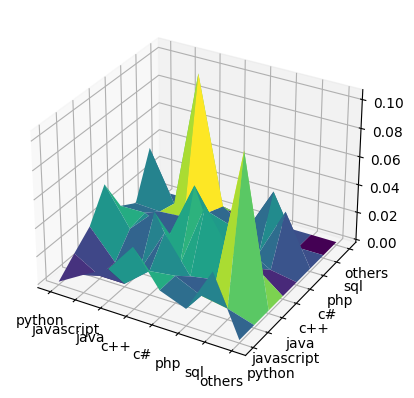

In [238]:
for i in range(8):
    result[i][i]=0
fig=plt.figure()
ax=plt.axes(projection='3d')
Z = np.array(result)
x = np.arange(1,9,1)
y = np.arange(1,9,1)
plt.xticks(x,label)
plt.yticks(y,label)
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', 
edgecolor='none')
plt.show()